In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

from sklearn.cluster import KMeans

In [2]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['target']=data['target']
df.shape

(569, 31)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
cols=list(df.columns)
cols.remove('target')

X=df[cols]
y=df['target']

In [7]:
var_covar_matrix = np.cov(X.transpose())
var_covar_matrix.shape

(30, 30)

In [8]:
eigenvalues = np.linalg.eig(var_covar_matrix)[0]
eigenectors = np.linalg.eig(var_covar_matrix)[1]

eigenvalues.sort()
eigenvalues = eigenvalues[::-1]

eigenvalues[:2]/sum(eigenvalues)

array([0.98204467, 0.01617649])

### Using libraries

Principal Component Analysis is a **constrained optimization problem** where the objective is to **maximize variance** of **linearly transformed component** given the constraint that the component is **normalized**. 

As a solution to the problem, the problem results into an **eigenvalue problem**.

In [9]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(X)

print('Variance Ratio (same as above): ', pca.explained_variance_ratio_)
print('Total Variance Explained: ', sum(pca.explained_variance_ratio_))

Variance Ratio (same as above):  [0.98204467 0.01617649]
Total Variance Explained:  0.9982211613741718


**Total Variance of data is given by trace of variance-covariance matrix**

In [10]:
total_pca_variance = np.trace(np.cov(pca_data.transpose()))
total_variance = np.trace(np.cov(X.transpose()))

print('Total Variance explained by transformed data:', total_pca_variance)
print('Total Variance of the original data:', total_variance)

print('\nVariance explained by PCA (same as above):', total_pca_variance/total_variance)

Total Variance explained by transformed data: 451092.7052082497
Total Variance of the original data: 451896.55625739874

Variance explained by PCA (same as above): 0.9982211613741726


**Two components can explain 99% of variance**

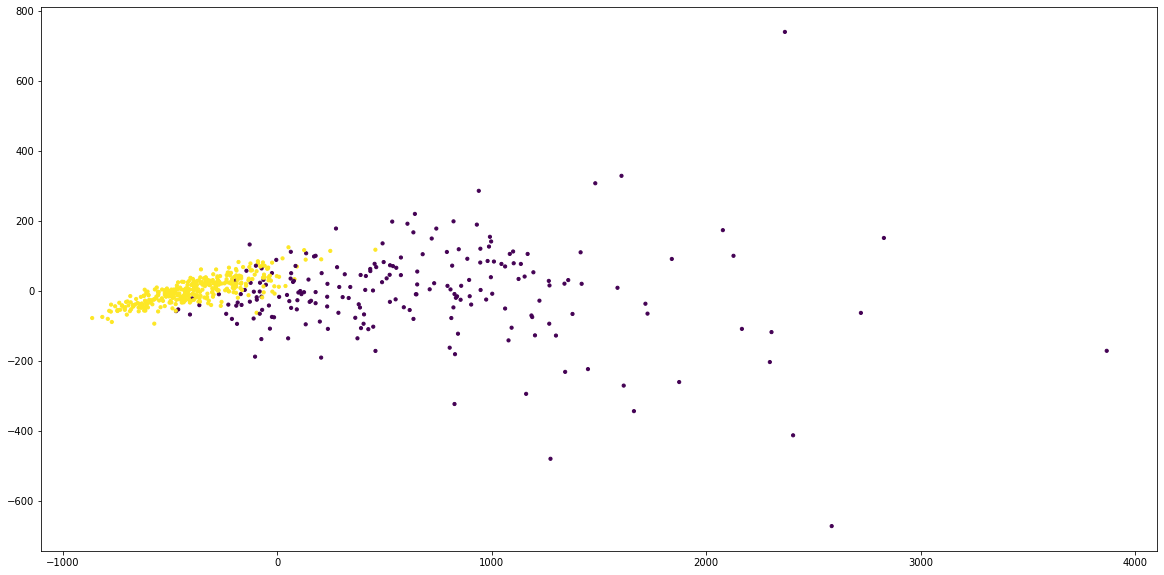

In [11]:
fig = plt.figure(figsize = (20, 10))

plt.scatter(pca_data[:,0], pca_data[:,1], c= y, s= 10)
plt.show()

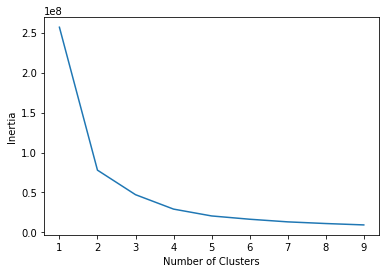

In [12]:
def compute_inertia(data, n_clusters):
    
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(X)

    return kmeans.inertia_

MAX_CLUSTERS = 10
INERTIA = list(map(lambda n: compute_inertia(X, n), range(1,MAX_CLUSTERS)))

plt.plot(range(1,MAX_CLUSTERS), INERTIA)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

**Optimal number of clusters: 2, which is correct as our data originally has two classes**

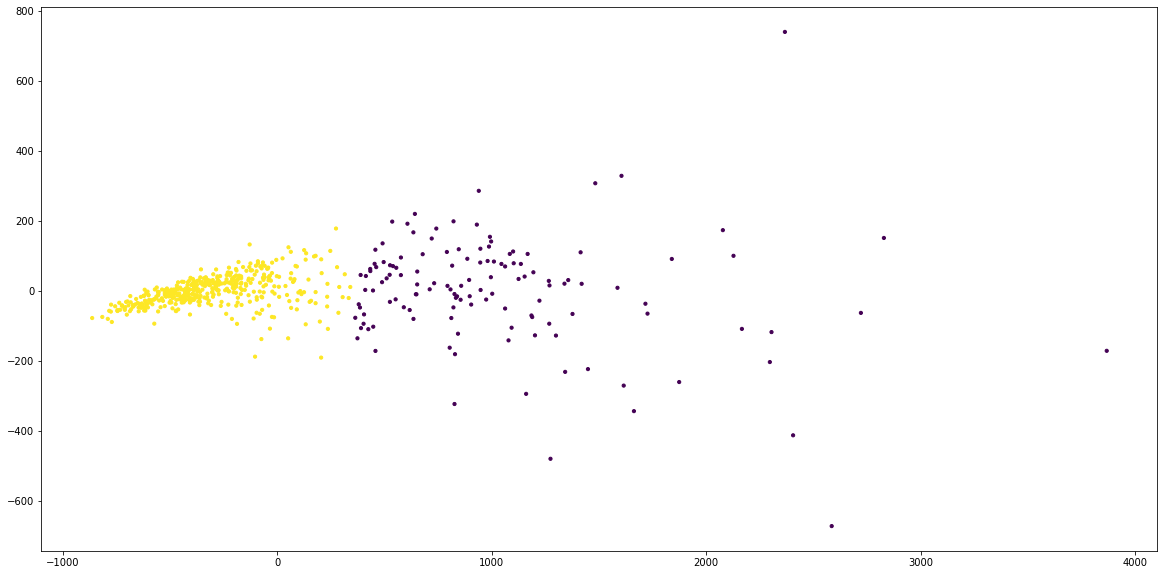

In [13]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

cluster_label = kmeans.labels_

pca=PCA(n_components=2)
pca_data=pca.fit_transform(X)

fig = plt.figure(figsize = (20, 10))
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_label, s=10)
plt.show()

**We notice a variation between the two plots. This is because KMeans has clustered some data points incorrectly (around X=0), let's look at the accuracy of clustering.**

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y, cluster_label)

0.8541300527240774

**Let's also visually compare dimension reduction done through t-SNE**

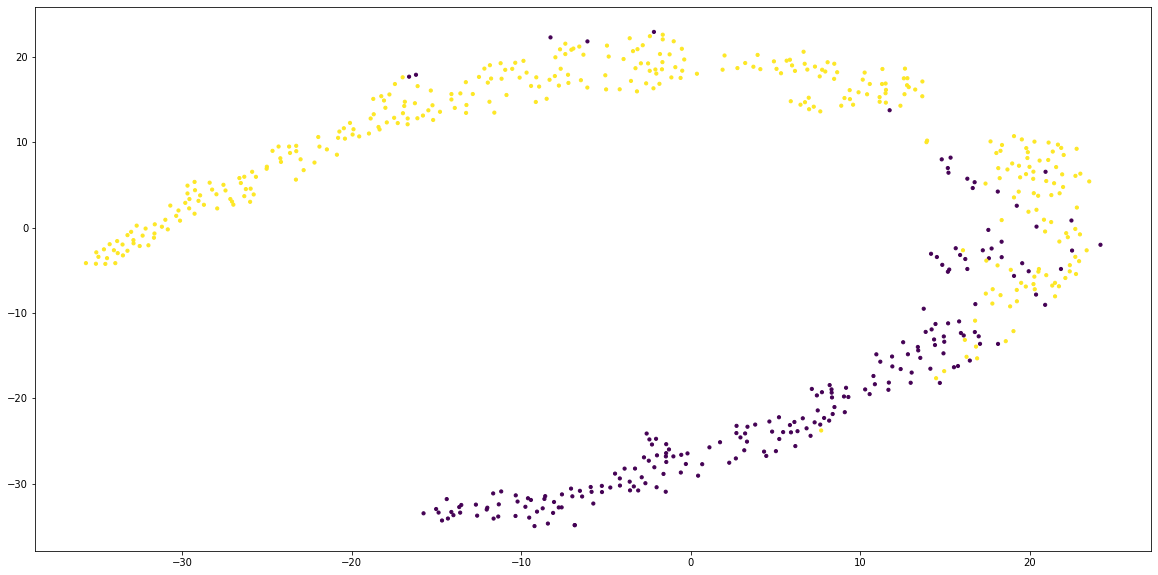

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=0)
tsne_data = tsne.fit_transform(X)

fig = plt.figure(figsize = (20, 10))
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=10, c=y)
plt.show()

In this case, both PCA and t-SNE work well. In cases where PCA cannot explain significant amount of variance within two dimensions, t-SNE can work better. Also, PCA has a drawback of suffering with **crowding problem (Digits Dataset)**.